---

### 📌 **Dataset Description**

* `images`: Colored images of shape `(64, 64, 3)` generated synthetically
* `labels`: Binary target labels:

  * `0` → Red Image
  * `1` → Blue Image

Total entries: **30**

* 15 Red images
* 15 Blue images

Images are created programmatically with solid red or blue channels.

---

### ✅ **Model**

* Task: **Binary Image Classification** using a **Convolutional Neural Network (CNN)**

* Preprocessing:

  * Pixel normalization (`/ 255.0`)
  * Train-test split (70% training, 30% testing)
  * Images shaped as `(64, 64, 3)`

* Model Architecture:

  * `Conv2D(16, (3, 3), activation='relu')`
  * `MaxPooling2D()`
  * `Conv2D(32, (3, 3), activation='relu')`
  * `MaxPooling2D()`
  * `Flatten()`
  * `Dense(64, activation='relu')`
  * `Dense(1, activation='sigmoid')`  ← Binary output

* Loss Function: `binary_crossentropy`

* Optimizer: `adam`

* Activation: `ReLU` for conv layers, `sigmoid` for output

---

### 📊 **Evaluation**

* Metrics:

  * `accuracy` on validation data
  * `confusion_matrix` (visualized using `seaborn.heatmap`)
  * `classification_report` with precision, recall, and F1-score

* Visualizations:

  * ✅ Accuracy curve across epochs using `matplotlib`
  * ✅ Confusion Matrix using `seaborn`
  * ✅ One sample prediction with output label

---

### 💡 **Libraries Used**

```python
tensorflow
numpy
matplotlib
sklearn (train_test_split, metrics)
seaborn (for confusion matrix heatmap)
```

In [23]:
import warnings
warnings.filterwarnings('ignore')
#import libraries
!pip install -q tensorflow matplotlib
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt
import random
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns


In [24]:
# Create 30 random color images (15 red class, 15 blue class)
def generate_image(color):
    img = np.zeros((64, 64, 3), dtype=np.uint8)
    if color == "red":
        img[:, :, 0] = np.random.randint(150, 256)  # Red channel
    elif color == "blue":
        img[:, :, 2] = np.random.randint(150, 256)  # Blue channel
    return img

# Dataset creation
images = []
labels = []

for _ in range(15):
    images.append(generate_image("red"))
    labels.append(0)  # Class 0: Red

for _ in range(15):
    images.append(generate_image("blue"))
    labels.append(1)  # Class 1: Blue

# Convert to numpy arrays
images = np.array(images) / 255.0  # Normalize
labels = np.array(labels)


In [25]:
# step 3: Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.3, random_state=42)

In [26]:
# step 4: Define CNN Model
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

In [27]:
# step 5: Compile and Train the Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.0000e+00 - loss: 0.7951 - val_accuracy: 1.0000 - val_loss: 0.4101
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step - accuracy: 1.0000 - loss: 0.3900 - val_accuracy: 1.0000 - val_loss: 0.2555
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step - accuracy: 1.0000 - loss: 0.2200 - val_accuracy: 1.0000 - val_loss: 0.1448
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step - accuracy: 1.0000 - loss: 0.1179 - val_accuracy: 1.0000 - val_loss: 0.0738
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step - accuracy: 1.0000 - loss: 0.0579 - val_accuracy: 1.0000 - val_loss: 0.0337
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step - accuracy: 1.0000 - loss: 0.0262 - val_accuracy: 1.0000 - val_loss: 0.0142
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step - accuracy: 1.0000 - loss: 0.0111 - val_accuracy: 1.0000 - val_loss: 0.0058
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step - accuracy: 1.0000 - loss: 0.0046 - val_accuracy: 1.0000 - val_loss

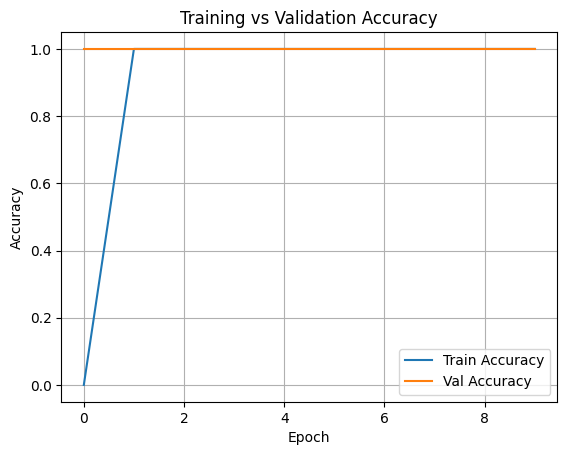

In [28]:
# step 6: Visualize Accuracy & Loss
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [29]:
# step 7: Evaluate the Model
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc*100:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 1.0000 - loss: 4.1001e-04
Test Accuracy: 100.00%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


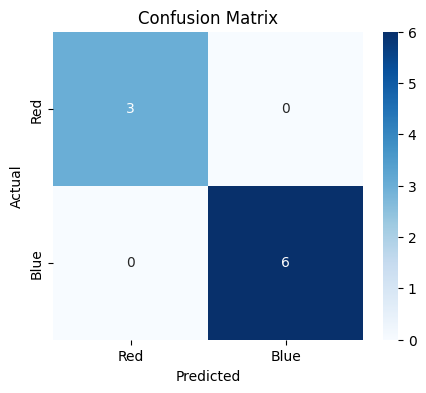

Classification Report:

              precision    recall  f1-score   support

         Red       1.00      1.00      1.00         3
        Blue       1.00      1.00      1.00         6

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9



In [30]:
# step 8: Confusion Matrix & Classification Report
# Get model predictions (probabilities)
y_pred_prob = model.predict(X_test)

# Convert probabilities to class labels (0 or 1)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Red', 'Blue'],
            yticklabels=['Red', 'Blue'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=['Red', 'Blue']))


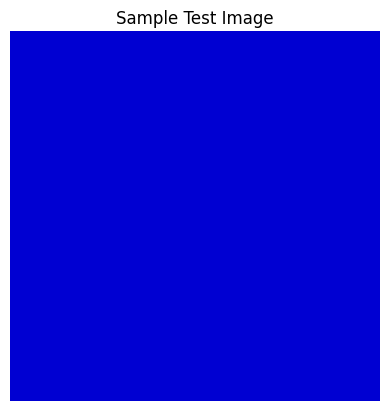

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
Predicted Class: Blue


In [31]:
# step 9: Predict on New Image
sample_img = X_test[0]
plt.imshow(sample_img)
plt.axis('off')
plt.title('Sample Test Image')
plt.show()
prediction = model.predict(np.expand_dims(sample_img, axis=0))[0][0]
print("Predicted Class:", "Blue" if prediction > 0.5 else "Red")